# GP Error Propagation (Step-by-Step)

In [59]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (ConstantKernel as C,
                                              RBF, WhiteKernel)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [60]:
def kernel_mat(X, theta, Y=None):
    signal_variance = theta[0]
    noise = theta[1]
    length_scale = theta[2:]
    
    K = C(signal_variance) * RBF(length_scale) + WhiteKernel(noise)
    
    return K(X, Y)

In [63]:
def f(x, K):
    n, d = np.shape(x)
    cov = kernel(x)
    mean = np.zeros(n)
    rng = np.random.RandomState(123)
    return rng.multivariate_normal(mean, cov)

In [64]:
# Preparing some parameters (just to create the example data)
x = np.array([[x1,x2] for x1 in range(10) for x2 in range(10)]) # 2d sim input (no need to be a neat grid in practice)
x_new = np.array([[x1/2.0,x2/2.0] for x1 in range(20) for x2 in range(20)])
gamma = np.array([0.04,0.04])   # GP bandwidth parameter
v = 2                       # GP variance parameter
sigma = 0.01                   # GP variance of the error epsilon

# Preparing the parameter vector
theta = np.zeros(2+len(gamma))
theta[0] = np.log(v)  # We actually use the log of the parameters as it is easier to optimize (no > 0 constraint etc.)
theta[1] = np.log(sigma)
theta[2:2+len(gamma)] = np.log(gamma)

kernel = C(v) * RBF(gamma) + WhiteKernel(sigma)
y = f(x, kernel)

### Plotting 3D Data ([Link](https://matplotlib.org/examples/mplot3d/trisurf3d_demo.html))

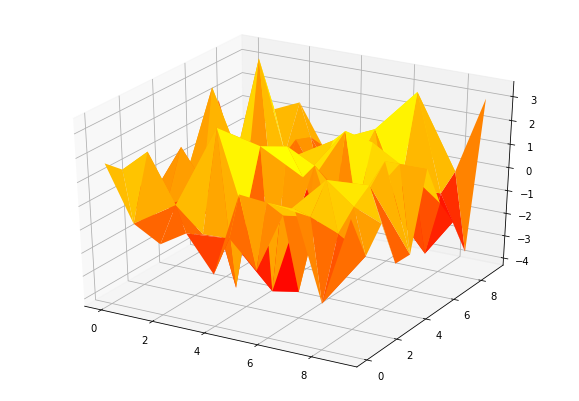

In [65]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

ax.plot_trisurf(x.T[0], x.T[1], y, cmap=plt.cm.autumn, linewidth=0.2)

plt.show()

In [90]:
new_kernel = C() * RBF() + WhiteKernel()
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10,
                                    random_state=123)

gp_model.fit(x, y);

y_pred = gp_model.predict(x_new)
print(gp_model.kernel_)

0.00316**2 * RBF(length_scale=[0.00727, 0.00186]) + WhiteKernel(noise_level=2.56)


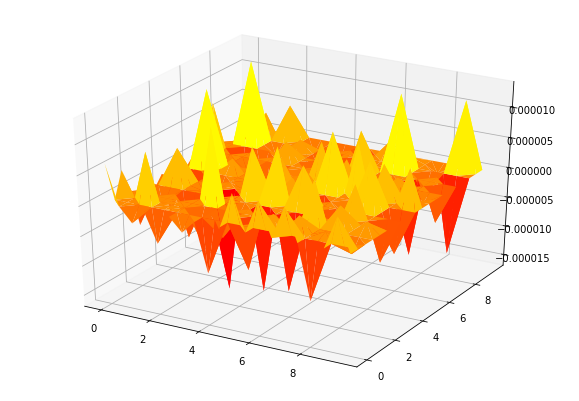

In [91]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

ax.plot_trisurf(x_new.T[0], x_new.T[1], y_pred, cmap=plt.cm.autumn, linewidth=0.2)

plt.show()

# Uncertainty Propagation

In [92]:
mean = np.array([5.0, 5.0])
sigmax = np.diag([0.01, 0.01])

### Initialize many parameters

In [100]:
def covariance(xi, xj):
    
    diff = xi-xj
    
    cov = v * np.exp(-0.5 * np.dot(diff.T, w * diff)) + (vt if (xi == xj).all() else 0)
    
    
    return cov

In [101]:
from scipy.linalg import solve_triangular

In [102]:
# diagonal inverse
v = 0.00316**2
vt = 2.56
w = np.array([0.00727, 0.00186])
Winv = np.diag(w)
u = None
beta = gp_model.alpha_
x = gp_model.X_train_
n = len(x)

Linv = solve_triangular(gp_model.L_, np.eye(gp_model.L_.shape[0]))
Kinv = np.dot(Linv, Linv.T)

if u is None or (u != u).any():
    u = y_pred
    C_ux = []
    J_ux = []
    H_ux = []
    for i in range(n):
        print(x.shape, n)
        print(y_pred.shape, x[i].shape)
        C_ux.append(covariance(y_pred, x[i]))
        break

(100, 2) 100
(400,) (2,)


ValueError: operands could not be broadcast together with shapes (400,) (2,) 